In [ ]:
%pip install pandas numpy 

In [ ]:
%pip install seaborn matplotlib xgboost lightgbm imbalanced-learn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
import xgboost as xgb
import lightgbm as lgb
from datetime import timedelta
from imblearn.over_sampling import SMOTE
import sys

Loading data from CSV file...
Data loaded successfully.

--- Initial Data Cleaning ---
Checking for missing values after load:
account_id                        4395
account_type                      4395
credit_limit                      4395
current_balance                   4395
date_opened                       4395
date_closed                      23197
payment_history_status            4395
total_payments_made               4395
months_since_last_delinquency     4395
is_defaulted                      4395
bureau_score_at_opening           4395
bankruptcies                      4395
public_records                    4395
dtype: int64
Dropped 4395 rows with missing 'is_defaulted' values.

Final check for missing values after handling:
date_closed    18802
dtype: int64

--- Feature Engineering ---
Created utilization and on-time payment features.
Created delinquency count features.
Created 'worst_delinquency_status'.

Creating a synthetic 'credit_score' for regression modeling...
Sy

C:\Users\Sujyot\AppData\Local\Temp\ipykernel_20236\3035499052.py:166: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education_level'].fillna(-1, inplace=True)


Classification Data split into:
  - Training set: 38400 records
  - Validation set: 12800 records
  - Test set: 12800 records

--- Displaying Sample of Each Dataset ---

X_train (Training Features):
       number_of_dependents  annual_income  time_at_current_job_months  \
39158                     4       47025.10                          62   
11062                     4       29269.82                          80   
64326                     2       46075.71                         191   
59315                     2       37605.49                         109   
60771                     3       50987.63                         176   

       education_level  time_at_current_address_months  credit_limit  \
39158              3.0                              30       7482.99   
11062             -1.0                             138      27530.15   
64326             -1.0                              58      11205.00   
59315             -1.0                             158      18960.95

c:\Users\Sujyot\Downloads\Work_Space\Projects\DS\TransUnion\myenv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

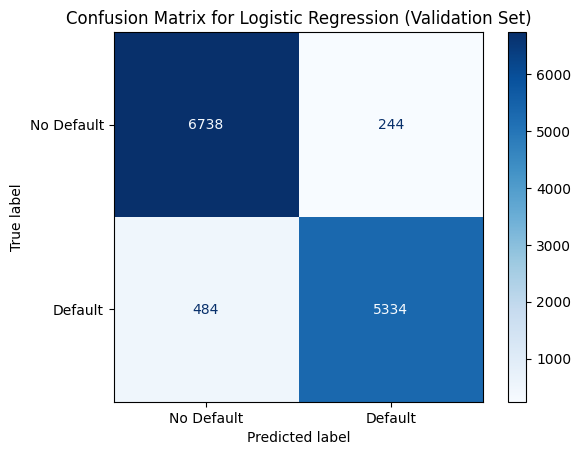

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6982
           1       0.96      0.92      0.94      5818

    accuracy                           0.94     12800
   macro avg       0.94      0.94      0.94     12800
weighted avg       0.94      0.94      0.94     12800


--- Training Random Forest Classifier on Resampled Data ---


<Figure size 800x600 with 0 Axes>

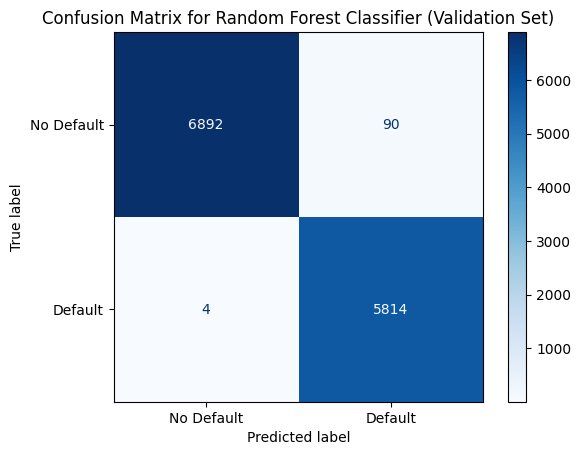

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6982
           1       0.98      1.00      0.99      5818

    accuracy                           0.99     12800
   macro avg       0.99      0.99      0.99     12800
weighted avg       0.99      0.99      0.99     12800


--- Training XGBoost Classifier on Resampled Data ---


c:\Users\Sujyot\Downloads\Work_Space\Projects\DS\TransUnion\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:53:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 800x600 with 0 Axes>

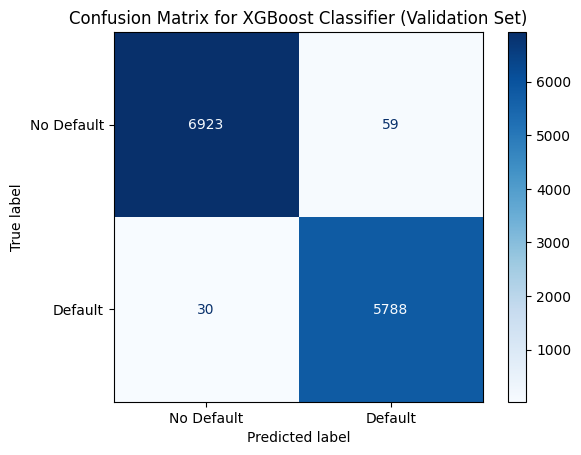

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6982
           1       0.99      0.99      0.99      5818

    accuracy                           0.99     12800
   macro avg       0.99      0.99      0.99     12800
weighted avg       0.99      0.99      0.99     12800


--- Training LightGBM Classifier on Resampled Data ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20944, number of negative: 20944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4308
[LightGBM] [Info] Number of data points in the train set: 41888, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initsco

<Figure size 800x600 with 0 Axes>

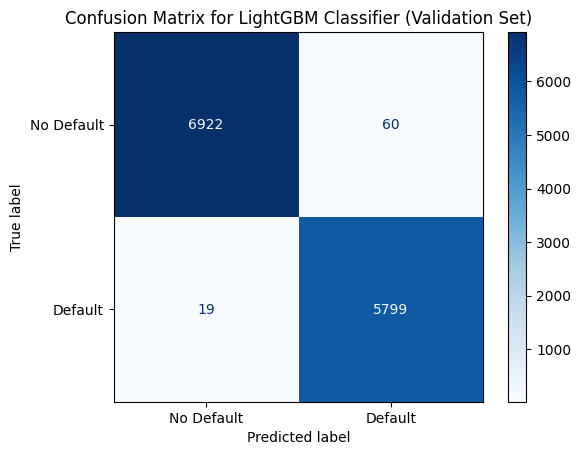

Classification Report for LightGBM Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6982
           1       0.99      1.00      0.99      5818

    accuracy                           0.99     12800
   macro avg       0.99      0.99      0.99     12800
weighted avg       0.99      0.99      0.99     12800


--- Training and Evaluating Regression Models (Credit Scoring) ---

--- Training Linear Regression ---
Evaluation for Linear Regression (Validation Set):
  - Mean Squared Error (MSE): 0.05
  - Root Mean Squared Error (RMSE): 0.23
  - R-squared (R²): 0.70


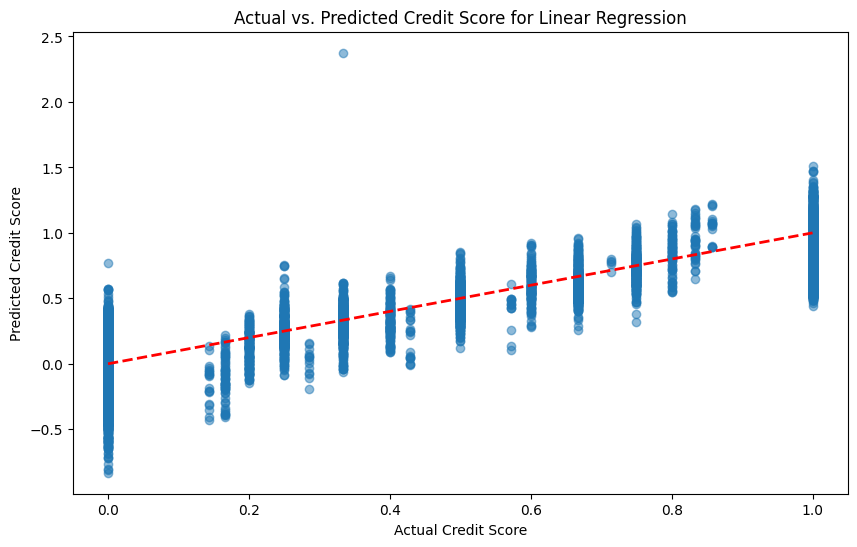


--- Training Random Forest Regressor ---
Evaluation for Random Forest Regressor (Validation Set):
  - Mean Squared Error (MSE): 0.00
  - Root Mean Squared Error (RMSE): 0.04
  - R-squared (R²): 0.99


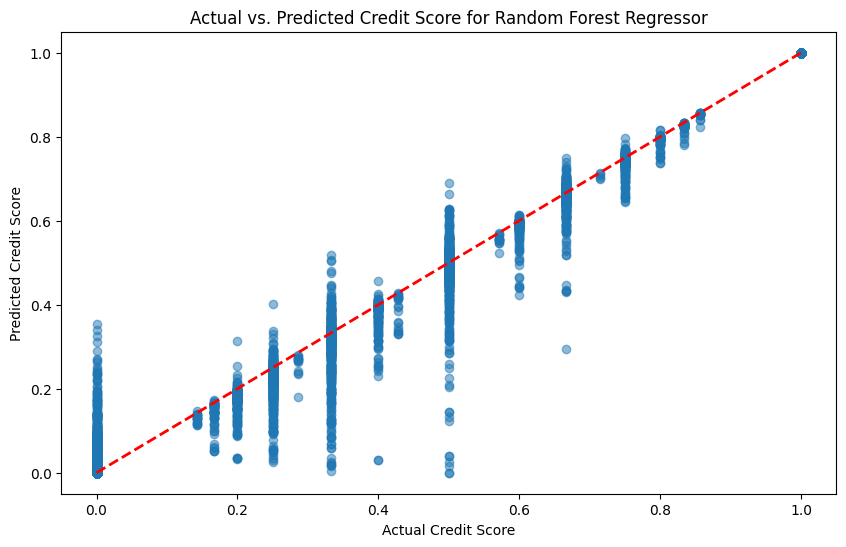


--- Training XGBoost Regressor ---
Evaluation for XGBoost Regressor (Validation Set):
  - Mean Squared Error (MSE): 0.00
  - Root Mean Squared Error (RMSE): 0.05
  - R-squared (R²): 0.99


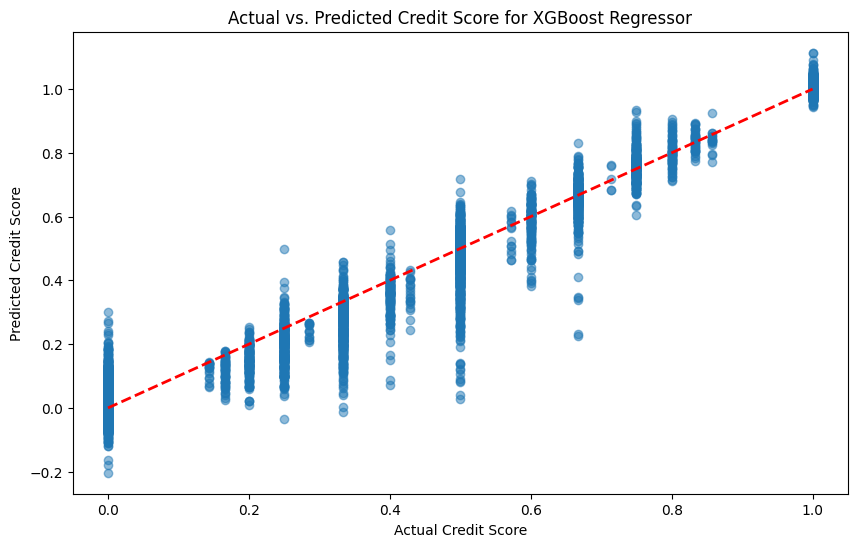


--- Training LightGBM Regressor ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3300
[LightGBM] [Info] Number of data points in the train set: 38400, number of used features: 32
[LightGBM] [Info] Start training from score 0.337691
Evaluation for LightGBM Regressor (Validation Set):
  - Mean Squared Error (MSE): 0.00
  - Root Mean Squared Error (RMSE): 0.06
  - R-squared (R²): 0.98


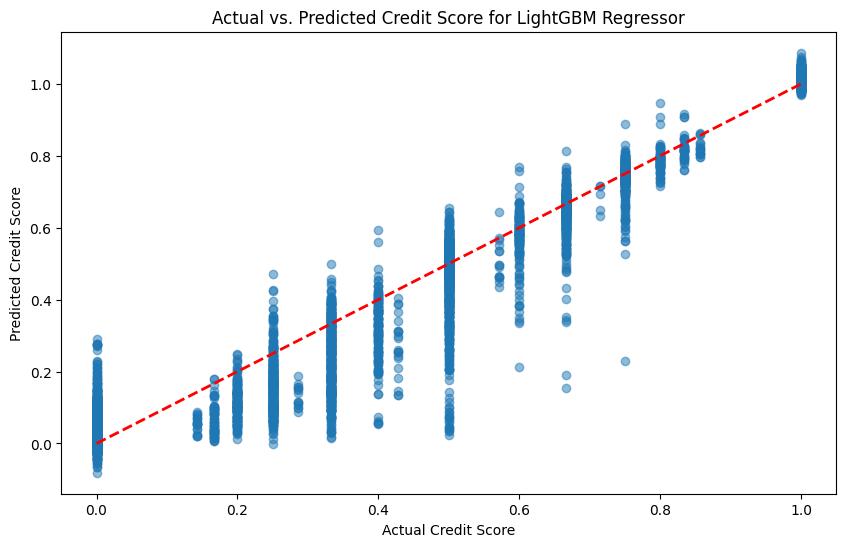


--- Final Evaluation on the Test Set ---

--- Final Evaluation of Random Forest Classifier ---


<Figure size 800x600 with 0 Axes>

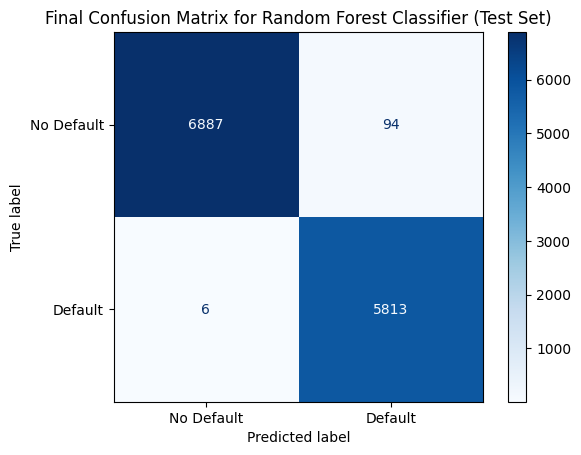

Final Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6981
           1       0.98      1.00      0.99      5819

    accuracy                           0.99     12800
   macro avg       0.99      0.99      0.99     12800
weighted avg       0.99      0.99      0.99     12800


--- Business Outcome KPI Analysis ---
1. Default Rate Reduction:
   - Baseline Default Rate: 45.46%
   - New Model's Default Rate on Approved Loans: 0.09%
   - Reduction: 99.81%

2. Loan Approval Rate: 53.85%

3. Estimated Profit Lift:
   - Est. Profit (New Model): $6,857,000.00
   - Est. Profit (Baseline): $-22,642,000.00
   - Profit Lift (New vs. Baseline): $29,499,000.00
   Note: Values are illustrative based on placeholder profit/loss values.

4. Estimated Losses Avoided: $29,065,000.00

--- Final Evaluation of Random Forest Regressor Model ---
Final Evaluation for Random Forest Regressor (Test Set):
  

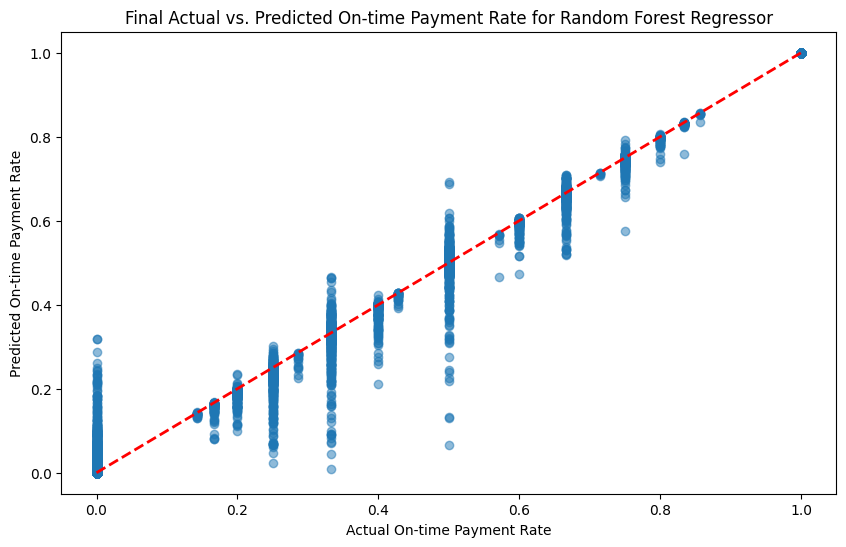


Model training and evaluation for both credit default and on-time payment rate complete.


In [14]:
def load_and_clean_data(file_path):
    try:
        print("Loading data from CSV file...")
        df = pd.read_csv(r"C:\Users\Sujyot\Downloads\Work_Space\Projects\DS\TransUnion\SDV\merged_credit_data.csv")
        print("Data loaded successfully.")

        print("\n--- Initial Data Cleaning ---")
        
        # Convert date columns to datetime data type
        df['date_opened'] = pd.to_datetime(df['date_opened'], errors='coerce')
        df['date_closed'] = pd.to_datetime(df['date_closed'], errors='coerce')
        df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')

        print("Checking for missing values after load:")
        missing_values = df.isnull().sum()
        print(missing_values[missing_values > 0])
        
        return df
    except FileNotFoundError as e:
        print(f"Error: The file was not found. Please check the file path.")
        print(f"Details: {e}")
        return pd.DataFrame()

def handle_missing_values(df):
    # Drop rows where the target variable 'is_defaulted' is missing
    initial_shape = df.shape[0]
    df.dropna(subset=['is_defaulted'], inplace=True)
    rows_dropped = initial_shape - df.shape[0]
    print(f"Dropped {rows_dropped} rows with missing 'is_defaulted' values.")
    
    # fill missing values for key numerical columns with the mean
    numerical_cols = ['credit_limit', 'current_balance', 'annual_income', 'total_payments_made', 'bureau_score_at_opening', 'months_since_last_delinquency']
    for col in numerical_cols:
        if df[col].isnull().any():
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)
            print(f"Imputed missing values in '{col}' with the mean ({mean_value:.2f}).")
            
    # fill missing values for key categorical columns with the mode
    # Added education_level to this list
    categorical_cols = ['employment_status', 'marital_status', 'education_level', 'account_type', 'payment_history_status']
    for col in categorical_cols:
        if df[col].isnull().any():
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Imputed missing values in '{col}' with the mode ('{mode_value}').")
            
    print("\nFinal check for missing values after handling:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    
    return df

def feature_engineer(df):
    print("\n--- Feature Engineering ---")
    
    # Payment and Utilization Feature engineering
    df['is_late'] = ~df['payment_history_status'].isin(['On Time'])
    df['on_time_payment_rate'] = 1 - df.groupby('customer_id')['is_late'].transform('mean')
    df['utilization_ratio'] = df['current_balance'] / (df['credit_limit'] + 1e-6)
    df['avg_credit_utilization'] = df.groupby('customer_id')['utilization_ratio'].transform('mean')
    df['max_credit_utilization'] = df.groupby('customer_id')['utilization_ratio'].transform('max')
    df['is_high_utilization'] = df['utilization_ratio'] > 0.8
    df['num_high_utilization_accounts'] = df.groupby('customer_id')['is_high_utilization'].transform('sum')
    print("Created utilization and on-time payment features.")

    # Delinquency Feature engineering
    df['num_delinquencies_30'] = df.groupby('customer_id')['payment_history_status'].transform(lambda x: (x == '30-60 Days Late').sum())
    df['num_delinquencies_60'] = df.groupby('customer_id')['payment_history_status'].transform(lambda x: (x == '60-90 Days Late').sum())
    df['num_delinquencies_90+'] = df.groupby('customer_id')['payment_history_status'].transform(lambda x: (x.str.contains('Defaulted')).sum())
    print("Created delinquency count features.")
    
    def get_worst_status(statuses):
        if (statuses == '90+ Days Late').any() or (statuses == '60-90 Days Late').any():
            return '90+'
        elif (statuses == '30-60 Days Late').any():
            return '60'
        else:
            return 'None'
    df['worst_delinquency_status'] = df.groupby('customer_id')['payment_history_status'].transform(get_worst_status)
    print("Created 'worst_delinquency_status'.")

    # Time-based Feature engineering
    today = pd.to_datetime('today')
    df['oldest_account_date'] = df.groupby('customer_id')['date_opened'].transform('min')
    df['youngest_account_date'] = df.groupby('customer_id')['date_opened'].transform('max')
    df['age_years'] = (today - df['date_of_birth']).dt.days / 365.25
    df['length_of_credit_history_years'] = (today - df['oldest_account_date']).dt.days / 365.25
    df['age_of_youngest_account_days'] = (today - df['youngest_account_date']).dt.days
    df['num_new_accounts_6m'] = df.groupby('customer_id')['date_opened'].transform(lambda x: ((today - x) < timedelta(days=180)).sum())
    df['num_new_accounts_1y'] = df.groupby('customer_id')['date_opened'].transform(lambda x: ((today - x) < timedelta(days=365)).sum())
    
    # Financial Feature engineering
    df['total_monthly_debt'] = df.groupby('customer_id')['current_balance'].transform('sum')
    df['DTI'] = df['total_monthly_debt'] * 12 / df['annual_income']
    df['is_active'] = df['date_closed'].isnull().astype(int)
    df['account_diversity_score'] = df.groupby('customer_id')['account_type'].transform('nunique')

    # Creating 'credit_score' feature for credit scoring problem which is regression problem
    print("\nCreating a synthetic 'credit_score' for regression modeling...")
    features = ['on_time_payment_rate', 'DTI', 'length_of_credit_history_years', 'age_years', 'annual_income']
    if not all(col in df.columns for col in features):
        print("Warning: Missing features for synthetic credit score creation.")
    
    prob_default = 1 / (1 + np.exp(0.5 * df['on_time_payment_rate'] - 0.1 * df['DTI'] + 0.2 * df['length_of_credit_history_years'] + 0.1 * df['age_years'] + 0.000001 * df['annual_income']))
    prob_default += np.random.normal(0, 0.05, len(df))
    prob_default = np.clip(prob_default, 0, 1)

    min_score, max_score = 300, 850
    df['credit_score'] = min_score + (max_score - min_score) * (1 - prob_default)
    
    df.loc[df['is_defaulted'] == 1, 'credit_score'] = np.clip(df.loc[df['is_defaulted'] == 1, 'credit_score'] - np.random.uniform(50, 150, df['is_defaulted'].sum()), min_score, max_score)
    df.loc[df['is_defaulted'] == 0, 'credit_score'] = np.clip(df.loc[df['is_defaulted'] == 0, 'credit_score'] + np.random.uniform(10, 50, (df['is_defaulted'] == 0).sum()), min_score, max_score)
    print("Synthetic 'credit_score' created.")
    
    return df

def handle_outliers(df):
    
    print("\n--- Handling Outliers ---")
    outlier_cols = ['annual_income', 'credit_limit', 'total_monthly_debt', 'DTI']
    for col in outlier_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        print(f"  - Outliers in '{col}' have been capped.")
    return df

def encode_features(df):
    
    print("\n--- Encoding Features ---")
    
    # Drop columns not needed for modeling, including date_closed as requested
    df.drop(columns=['account_id', 'date_opened', 'date_closed', 'youngest_account_date', 
                     'oldest_account_date', 'is_late', 'is_high_utilization', 
                     'utilization_ratio', 'current_address', 'date_of_birth', 
                     'current_balance', 'total_payments_made', 'payment_history_status'], 
                     inplace=True, errors='ignore')

    # One-Hot Encoding
    nominal_cols = ['employment_status', 'marital_status', 'account_type']
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)
    print("One-hot encoded nominal categorical features.")
    
    # Ordinal Encoding
    df['is_defaulted'] = df['is_defaulted'].astype(int)
    print("Encoded 'is_defaulted' to integer (0 or 1).")

    worst_delinquency_mapping = {'None': 0, '60': 1, '90+': 2}
    df['worst_delinquency_status'] = df['worst_delinquency_status'].map(worst_delinquency_mapping)
    print("Encoded 'worst_delinquency_status' using manual mapping.")

    education_level_mapping = {
        'High School': 0,
        'Bachelor\'s': 1,
        'Master\'s': 2,
        'PhD': 3
    }
    df['education_level'] = df['education_level'].map(education_level_mapping)
    # Handle any NaNs introduced by the mapping
    df['education_level'].fillna(-1, inplace=True)
    print("Encoded 'education_level' using manual mapping and handled any NaNs.")
    
    # Drop the original categorical column
    df.drop(columns=['worst_delinquency_status'], inplace=True, errors='ignore')

    print("\nFinal DataFrame shape for modeling:", df.shape)
    
    return df

def train_and_evaluate_classification(X_train, X_val, y_train, y_val):
    
    print("\n--- Training and Evaluating Classification Models (Credit Default) ---")

    print("\n--- Handling Class Imbalance with SMOTE ---")
    print("Original training set class distribution:")
    print(y_train.value_counts())
    
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    print("\nResampled training set class distribution:")
    print(y_train_res.value_counts())

    models = {
        'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
        'Random Forest Classifier': RandomForestClassifier(random_state=42),
        'XGBoost Classifier': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'LightGBM Classifier': lgb.LGBMClassifier(random_state=42)
    }

    for name, model in models.items():
        print(f"\n--- Training {name} on Resampled Data ---")
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_val)
        
        cm = confusion_matrix(y_val, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
        
        plt.figure(figsize=(8, 6))
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f'Confusion Matrix for {name} (Validation Set)')
        plt.show()

        print(f"Classification Report for {name}:")
        print(classification_report(y_val, y_pred))
        
def train_and_evaluate_regression(X_train, X_val, y_train, y_val):
    print("\n--- Training and Evaluating Regression Models (Credit Scoring) ---")
    
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(random_state=42),
        'XGBoost Regressor': xgb.XGBRegressor(random_state=42, n_jobs=-1),
        'LightGBM Regressor': lgb.LGBMRegressor(random_state=42)
    }

    for name, model in models.items():
        print(f"\n--- Training {name} ---")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_pred)

        print(f"Evaluation for {name} (Validation Set):")
        print(f"  - Mean Squared Error (MSE): {mse:.2f}")
        print(f"  - Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"  - R-squared (R²): {r2:.2f}")
        
        plt.figure(figsize=(10, 6))
        plt.scatter(y_val, y_pred, alpha=0.5)
        plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
        plt.title(f'Actual vs. Predicted Credit Score for {name}')
        plt.xlabel('Actual Credit Score')
        plt.ylabel('Predicted Credit Score')
        plt.show()

def calculate_and_report_kpis(y_true, y_pred, cm):
   
    print("\n--- Business Outcome KPI Analysis ---")
    
    # Extract values from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    total_population = tn + fp + fn + tp
    
    # 1. Default Rate Reduction
    # Baseline: The default rate of the entire population (before applying the model)
    baseline_default_rate = y_true.sum() / total_population
    
    # New Model: The default rate of the approved loans (True Negatives + False Negatives)
    # The new default rate is the number of unflagged defaults (FN) divided by all approved loans (TN + FN).
    new_model_default_rate = fn / (tn + fn) if (tn + fn) > 0 else 0
    
    default_rate_reduction = (baseline_default_rate - new_model_default_rate) / baseline_default_rate
    print(f"1. Default Rate Reduction:")
    print(f"   - Baseline Default Rate: {baseline_default_rate:.2%}")
    print(f"   - New Model's Default Rate on Approved Loans: {new_model_default_rate:.2%}")
    print(f"   - Reduction: {default_rate_reduction:.2%}")
    
    # 2. Loan Approval Rate
    # The approval rate is the percentage of loans approved by the model (TN + FN)
    loan_approval_rate = (tn + fn) / total_population
    print(f"\n2. Loan Approval Rate: {loan_approval_rate:.2%}")
    
    # 3. Estimated Profit Lift
    # Define placeholder values for profit and loss
    profit_per_approved_loan = 1000  # Example: average profit on a non-defaulted loan
    loss_per_default = 5000         # Example: average loss on a defaulted loan
    
    # Calculate the estimated financial outcome for the new model
    profit_from_approved = tn * profit_per_approved_loan
    loss_from_defaults = fn * loss_per_default
    total_profit_new_model = profit_from_approved - loss_from_defaults
    
    # Calculate the estimated financial outcome for a baseline model (approve everyone)
    # The baseline model would have all true negatives and all false positives.
    # It would approve everyone, so its total profit is (tn + fn) * profit - (tp + fp) * loss
    baseline_profit = (tn + fn) * profit_per_approved_loan - (tp + fp) * loss_per_default
    
    profit_lift = total_profit_new_model - baseline_profit
    
    print(f"\n3. Estimated Profit Lift:")
    print(f"   - Est. Profit (New Model): ${total_profit_new_model:,.2f}")
    print(f"   - Est. Profit (Baseline): ${baseline_profit:,.2f}")
    print(f"   - Profit Lift (New vs. Baseline): ${profit_lift:,.2f}")
    print("   Note: Values are illustrative based on placeholder profit/loss values.")
    
    # 4. Losses Avoided
    # This is the value saved by correctly identifying and denying high-risk applicants (TP).
    losses_avoided = tp * loss_per_default
    print(f"\n4. Estimated Losses Avoided: ${losses_avoided:,.2f}")

def final_evaluation(X_test, y_class_test, y_reg_test, X_train_val_resampled, y_class_train_val_resampled, X_train_val_reg, y_reg_train_val):
    
    print("\n--- Final Evaluation on the Test Set ---")

    # --- Classification Model Final Evaluation ---
    print("\n--- Final Evaluation of Random Forest Classifier ---")
    
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train_val_resampled, y_class_train_val_resampled)
    y_pred_class = rf_classifier.predict(X_test)
    
    cm = confusion_matrix(y_class_test, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Final Confusion Matrix for Random Forest Classifier (Test Set)')
    plt.show()
    
    print("Final Classification Report for Random Forest Classifier:")
    print(classification_report(y_class_test, y_pred_class))

    # Calculate and report KPIs using the new function
    calculate_and_report_kpis(y_class_test, y_pred_class, cm)

    # --- Regression Model Final Evaluation ---
    print("\n--- Final Evaluation of Random Forest Regressor Model ---")
    rf_regressor = RandomForestRegressor(random_state=42)
    rf_regressor.fit(X_train_val_reg, y_reg_train_val)
    y_pred_reg = rf_regressor.predict(X_test)
    
    mse = mean_squared_error(y_reg_test, y_pred_reg)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_reg_test, y_pred_reg)

    print(f"Final Evaluation for Random Forest Regressor (Test Set):")
    print(f"  - Mean Squared Error (MSE): {mse:.4f}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  - R-squared (R²): {r2:.4f}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_reg_test, y_pred_reg, alpha=0.5)
    plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
    plt.title('Final Actual vs. Predicted On-time Payment Rate for Random Forest Regressor')
    plt.xlabel('Actual On-time Payment Rate')
    plt.ylabel('Predicted On-time Payment Rate')
    plt.show()

def main():
   
    file_path = r"C:\Users\varun\OneDrive\Desktop\workoopolis project\transunion project\merged_credit_data transunion.csv"

    df_loaded = load_and_clean_data(file_path)
    if df_loaded.empty:
        return
    
    # Call the new function to handle missing values
    df_with_nans_handled = handle_missing_values(df_loaded)
        
    df_final = feature_engineer(df_with_nans_handled)
    df_cleaned = handle_outliers(df_final)
    df_encoded = encode_features(df_cleaned)
    
    # Final check for NaNs before splitting the data
    print("\nFinal check for missing values before data split:")
    missing_values = df_encoded.isnull().sum()
    print(missing_values[missing_values > 0])
    
    #  dropping any remaining rows with NaNs to prevent errors
    df_encoded.dropna(inplace=True)
    print("Dropped rows with any remaining NaNs.")

    # Split the data into training, validation, and test sets
    X = df_encoded.drop(columns=['customer_id', 'is_defaulted', 'on_time_payment_rate'])
    y_class = df_encoded['is_defaulted']
    y_reg = df_encoded['on_time_payment_rate']

    X_train_val, X_test, y_class_train_val, y_class_test = train_test_split(
        X, y_class, test_size=0.2, random_state=42, stratify=y_class
    )
    y_reg_train_val = y_reg.loc[y_class_train_val.index]
    y_reg_test = y_reg.loc[y_class_test.index]
    
    X_train, X_val, y_class_train, y_class_val = train_test_split(
        X_train_val, y_class_train_val, test_size=0.25, random_state=42, stratify=y_class_train_val
    )
    y_reg_train = y_reg_train_val.loc[y_class_train.index]
    y_reg_val = y_reg_train_val.loc[y_class_val.index]
    
    print(f"Classification Data split into:")
    print(f"  - Training set: {X_train.shape[0]} records")
    print(f"  - Validation set: {X_val.shape[0]} records")
    print(f"  - Test set: {X_test.shape[0]} records")
    
    print("\n--- Displaying Sample of Each Dataset ---")

    print("\nX_train (Training Features):")
    print(X_train.head())

    print("\nX_val (Validation Features):")
    print(X_val.head())

    print("\nX_test (Test Features):")
    print(X_test.head())

    print("\ny_class_train (Training Classification Target):")
    print(y_class_train.head())

    print("\ny_class_val (Validation Classification Target):")
    print(y_class_val.head())

    print("\ny_class_test (Test Classification Target):")
    print(y_class_test.head())

    print("\ny_reg_train (Training Regression Target):")
    print(y_reg_train.head())

    print("\ny_reg_val (Validation Regression Target):")
    print(y_reg_val.head())

    print("\ny_reg_test (Test Regression Target):")
    print(y_reg_test.head())
    
    # Train and evaluate models on the validation set
    train_and_evaluate_classification(X_train, X_val, y_class_train, y_class_val)
    train_and_evaluate_regression(X_train, X_val, y_reg_train, y_reg_val)
    
    # Resample the entire training+validation set for final evaluation
    smote = SMOTE(random_state=42)
    X_train_val_resampled, y_class_train_val_resampled = smote.fit_resample(X_train_val, y_class_train_val)

    # performing final evaluation on the test set
    final_evaluation(X_test, y_class_test, y_reg_test, 
                     X_train_val_resampled, y_class_train_val_resampled,
                     X_train_val, y_reg_train_val)
    
    print("\nModel training and evaluation for both credit default and on-time payment rate complete.")

if __name__ == "__main__":
    main()